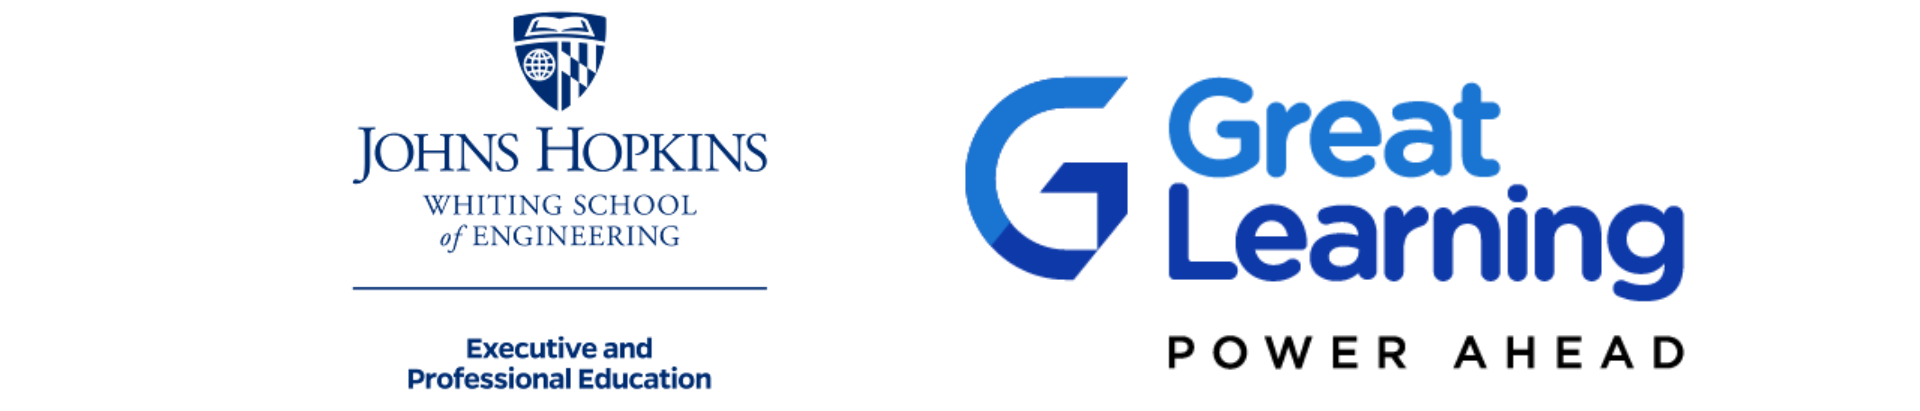

# **Project 1 - DualLens Analytics**

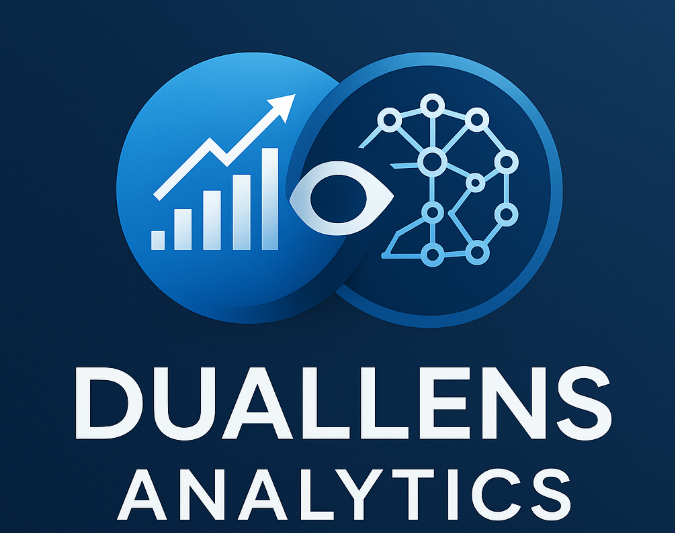

### **Background Story**
In the rapidly evolving world of finance and technology, investors are constantly seeking ways to make smarter decisions by combining traditional financial analysis with emerging technological insights. While stock market trends provide a numerical perspective on growth, an organization’s initiatives in cutting-edge fields like Artificial Intelligence (AI) reveal its future readiness and innovation potential.
However, analyzing both dimensions - quantitative financial performance and qualitative AI initiatives - requires sifting through multiple, diverse data sources: stock data from platforms like Yahoo Finance, reports in PDFs, and contextual reasoning using Large Language Models (LLMs).

This is where **DualLens Analytics** comes in. By applying a dual-lens approach, the project leverages **Retrieval-Augmented Generation (RAG)** to merge **financial growth data** with **strategic insights from organizational reports**. Stock data provides evidence of stability and momentum, while AI initiative documents reveal forward-looking innovation. Together, they form a richer, more holistic picture of organizational potential.

With DualLens Analytics, investors no longer need to choose between numbers and narratives—they gain a unified, AI-driven perspective that ranks organizations by both financial strength and innovation readiness, enabling smarter, future-focused investment strategies.

### **Problem Statement**

Traditional investment analysis often focuses on financial metrics alone (e.g., stock growth, revenue, market cap), missing the qualitative dimension of how prepared a company is for the future.
On the other hand, qualitative documents like strategy PDFs contain valuable insights about innovation and AI initiatives, but they are difficult to structure, query, and integrate with numeric financial data.

This leads to three core challenges:

1. **Fragmented Data Sources:** Financial data (stock prices) and strategic insights (PDFs) exist in silos.

2. **Limited Analytical Scope:** Manual analysis of growth trends and PDF reports is time-consuming and error-prone.

3. **Decisional Blind Spots:** Without integrating both quantitative (growth trends) and qualitative (AI initiatives) signals, investors may miss out on high-potential organizations.

### **Solution Approach**
To address this challenge, we set out to build a **Retrieval-Augmented Generation (RAG)** powered system that blends financial trends with AI-related strategic insights, helping investors rank organizations based on growth trajectory and innovation capacity.

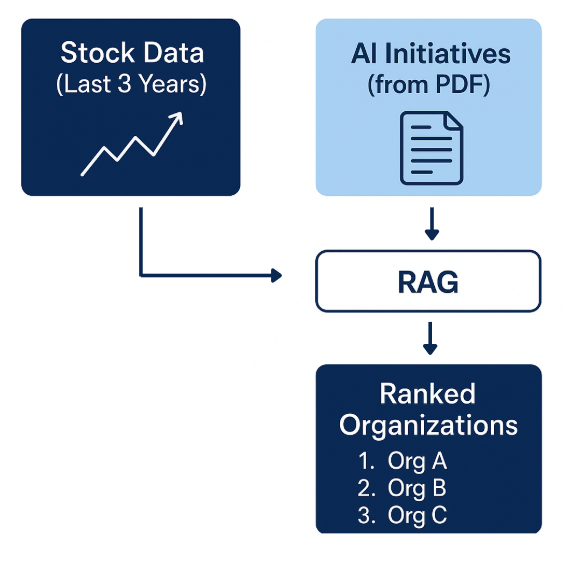


## <font color="red"> **NOTE**
You need to look for  `"--- --- ---"`   and add your code over there, this is a placeholder.</font>

#**Setting up Installations and Imports**

In [1]:
# @title Run this cell => Restart the session => Start executing the below cells **(DO NOT EXECUTE THIS CELL AGAIN)**

!pip install langchain==0.3.25 \
                langchain-core==0.3.65 \
                langchain-openai==0.3.24 \
                chromadb==0.6.3 \
                langchain-community==0.3.20 \
                pypdf==5.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of langchain-text-splitters to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.7 MB/s eta

In [1]:
import yfinance as yf              # Used for gathering stock prices
import matplotlib.pyplot as plt    # Used for Data Visualization / Plots / Graphs
import pandas as pd                # Helpful for working with tabular data like DataFrames
import os                          # Interacting with the operating system

from langchain.text_splitter import RecursiveCharacterTextSplitter      #  Helpful in splitting the PDF into smaller chunks

from langchain_community.document_loaders import PyPDFDirectoryLoader, PyPDFLoader     # Loading a PDF
from langchain_community.vectorstores import Chroma    # Vector DataBase

#**1. Organization Selection**

Selecting the below five organizations as the analysis pool.



In [7]:
companies = ["GOOGL", "MSFT", "IBM", "NVDA", "AMZN", "TSLA"]

#**2. Setting up LLM - 1 Marks**

- The `config.json` file should contain **API_KEY** and **API BASE URL** provided by OpenAI.
- You need to insert your actual API keys and endpoint URL obtained from your Olympus account. Refer to the **OpenAI Access Token documentation** for more information on how to generate and manage your API keys.
- This code reads the `config.json` file and extracts the API details.
  - The `API_KEY` is a **unique secret key** that authorizes your requests to OpenAI's API.
  - The `OPENAI_API_BASE` is the **API BASE URL** where the model will process your requests.

**What To Do?**
- Use the sample `config.json` file provided.
- Add their **OpenAI API Key** and **Base URL** to the file.
- The `config.json` should look like this:

  ```
  {
        "API_KEY": "your_openai_api_key_here",
        "OPENAI_API_BASE": "https://your_openai_api_base/v1"
      }
  ```

In [4]:
#Loading the `config.json` file
import json
import os

# Load the JSON file and extract values
file_name = "config.json"
with open(file_name, 'r') as file:
    config = json.load(file)
    os.environ['OPENAI_API_KEY'] = config["API_KEY"] # Loading the API Key
    os.environ["OPENAI_BASE_URL"] = config["OPENAI_API_BASE"] # Loading the API Base Url

In [5]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    model="gpt-4o-mini",                      # "gpt-4o-mini" to be used as an LLM
    temperature=0,           # Set the temprature to 0
    max_tokens=5000,                 # Set the max_tokens = 5000, so that the long response will not be clipped off
    top_p=0.95,
    frequency_penalty=1.2,
    stop_sequences=['INST']
)

#**3. Visualization and Insight Extraction - 5 Marks**

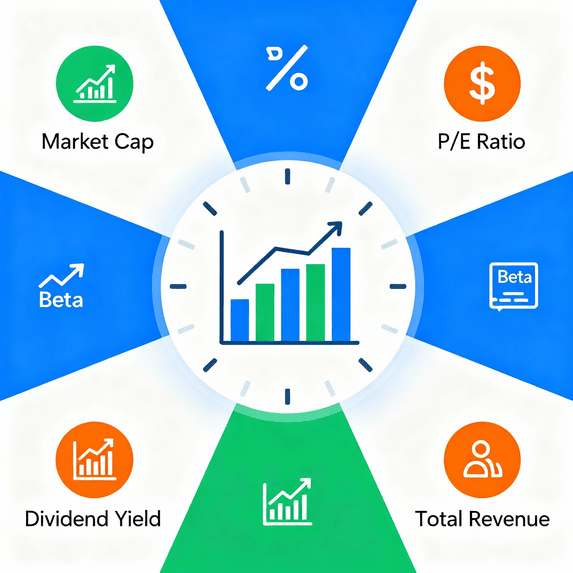

Gather stock data for the selected organization from the past three years using the YFinance library, and visualize this data for enhanced analysis.

> <font color="red" size=5>**Your Task**</font>
1. Loop through each company to retrieve stock data of the last three years using the YFinance library.
2. Plot the closing prices for each company.

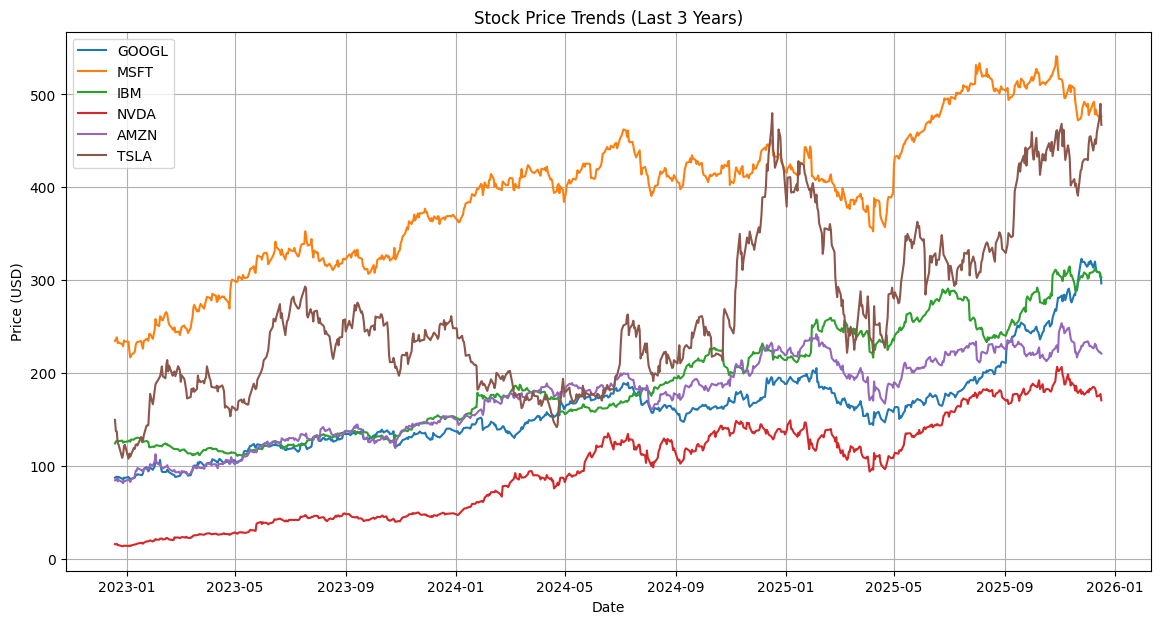

In [8]:
plt.figure(figsize=(14,7))

# Loop through each company and plot closing prices
for symbol in companies:
    ticker = yf.Ticker(symbol)
    data = ticker.history(period="3y")

    # Plot closing price
    plt.plot(data.index, data['Close'], label=symbol)

plt.title("Stock Price Trends (Last 3 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.savefig("Stock_Price_Trends_3Y.png")
plt.show()

#### **Financial Metrics**

1. **Market Cap:** Total market value of a company’s outstanding shares.
2. **P/E Ratio:** Shows how much investors are willing to pay per dollar of earnings.
3. **Dividend Yield:** Annual dividend income as a percentage of the stock price.
4. **Beta**: Measures a stock’s volatility relative to the overall market.
5. **Total Revenue:** The total income a company generates from its business operations.





> <font color="red" size=5>**Your Task**</font>

1. Loop through all the companies to fetch data based on the specified financial metrics.
2. Create a DataFrame (DF) from the collected data.
3. Visualize and compare each financial metric across all companies.
4. For example, visualize and compare the market capitalization for each company.


*Tip: Check `ticker.info` for the available financial metrics*

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

companies = ["GOOGL", "MSFT", "IBM", "NVDA", "AMZN", "TSLA", "META"]
metrics_list = {}

# Fetching the financial metrics
for symbol in companies:                          # Loop through all the companies
    ticker = yf.Ticker(symbol)
    info = ticker.info
    metrics_list[symbol] = {                              # Define the dictionary of all the Finanical Metrics
        "Market Cap": info.get("marketCap", 0),
        "P/E Ratio": info.get("trailingPE", 0),
        "P/E Growth Ratio": info.get("trailingPegRatio", 0),
        "Total Revenue": info.get("totalRevenue", 0),
        "Return on Equity (ROE)": info.get("returnOnEquity", 0),
        "Free Cash Flow": info.get("freeCashflow", 0),
        "Price-to-Book (P/B) Ratio": info.get("priceToBook", 0),
        "Debt-to-Equity Ratio": info.get("debtToEquity", 0),
        "Dividend Yield": info.get("dividendYield", 0),
        "Beta": info.get("beta", 0)
    }

In [26]:
# Convert to DataFrame
df = pd.DataFrame(metrics_list).T

# Converting large numbers to billions for readability by divinding the whole column by 1e9
df["Market Cap"] = df["Market Cap"] / 1e9
df["Total Revenue"] = df["Total Revenue"] / 1e9
df["Free Cash Flow"] = df["Free Cash Flow"] / 1e9
df["Dividend Yield"] = df["Dividend Yield"] * 100  # Convert to percentage

df   # Printing the df

Market Cap   P/E Ratio  P/E Growth Ratio  Total Revenue  \
GOOGL  3593.908781   29.320158            1.5742     385.476002   
MSFT   3539.079004   33.887543            1.9464     293.812011   
IBM     283.523908   36.109528            2.0757      65.401999   
NVDA   4161.876263   42.416870            0.6537     187.141997   
AMZN   2365.424140   31.252827            1.4973     691.330023   
TSLA   1554.022269  322.248260            9.3333      95.632998   
META   1636.853350   28.734911            1.5339     189.458006   

       Return on Equity (ROE)  Free Cash Flow  Price-to-Book (P/B) Ratio  \
GOOGL                 0.35450       47.997751                   9.262947   
MSFT                  0.32241       53.327376                   9.748567   
IBM                   0.30156       11.757500                  10.160453   
NVDA                  1.07359       53.282873                  34.942764   
AMZN                  0.24327       26.080000                   6.397490   
TSLA                  0.06791        2.979250                  19.422230   
META                  0.32643       18.617750                   8.436074   

       Debt-to-Equity Ratio  Dividend Yield   Beta  
GOOGL                11.424            28.0  1.070  
MSFT                 33.154            76.0  1.070  
IBM                 237.831           222.0  0.689  
NVDA                  9.102             2.0  2.284  
AMZN                 43.405             0.0  1.372  
TSLA                 17.082             0.0  1.878  
META                 26.311            32.0  1.273

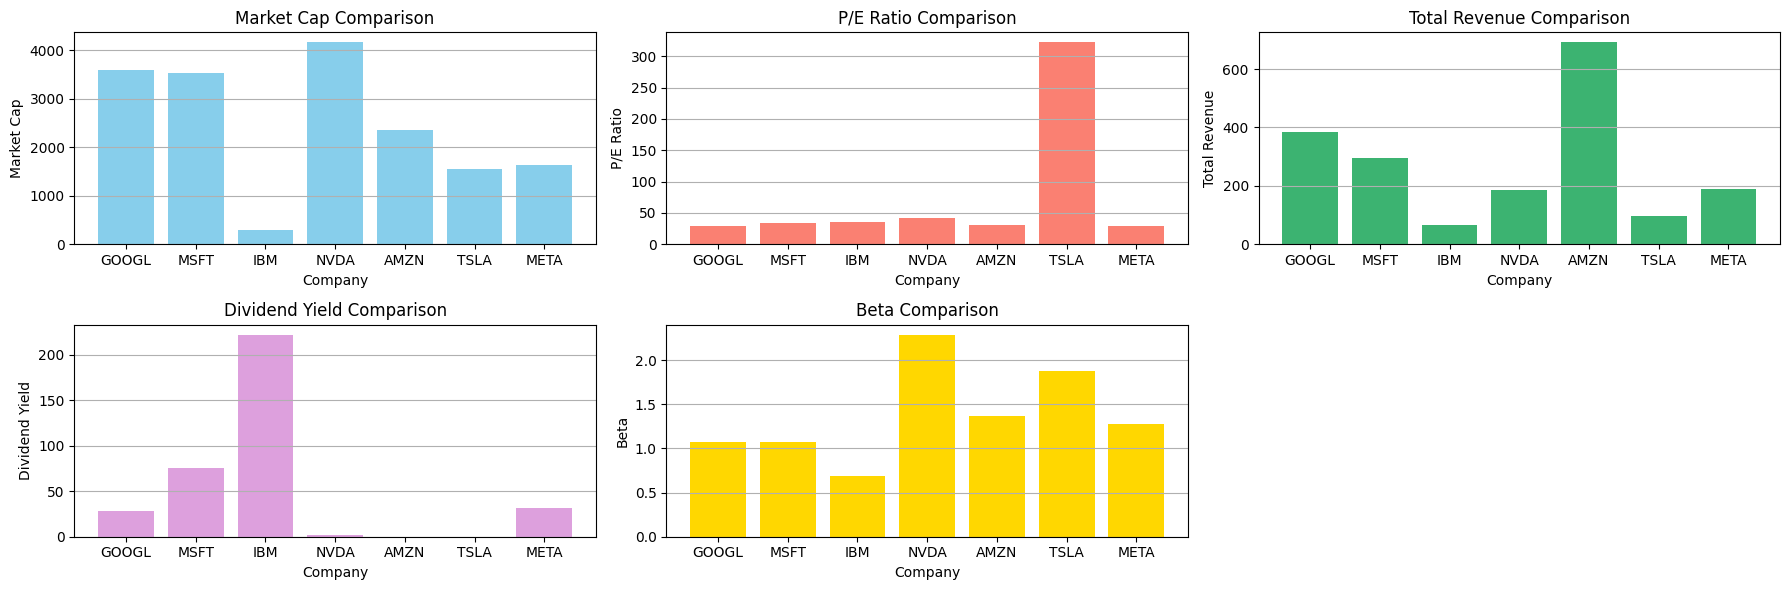

In [30]:
import matplotlib.pyplot as plt
import math

metrics_to_plot = ["Market Cap", "P/E Ratio", "Total Revenue", "Dividend Yield", "Beta"]

# Colors to cycle through
colors = ['skyblue', 'salmon', 'mediumseagreen', 'plum', 'gold']

# Number of columns and rows
n_cols = 3
n_rows = math.ceil(len(metrics_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))

# Flatten axes for iteration
axes = axes.flatten() if n_rows > 1 else [axes]

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    ax.bar(df.index, df[metric], color=colors[i % len(colors)])
    ax.set_title(f"{metric} Comparison")
    ax.set_ylabel(metric)
    ax.set_xlabel("Company")
    ax.grid(axis='y')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#**4. RAG-Driven Analysis - 7 Marks**

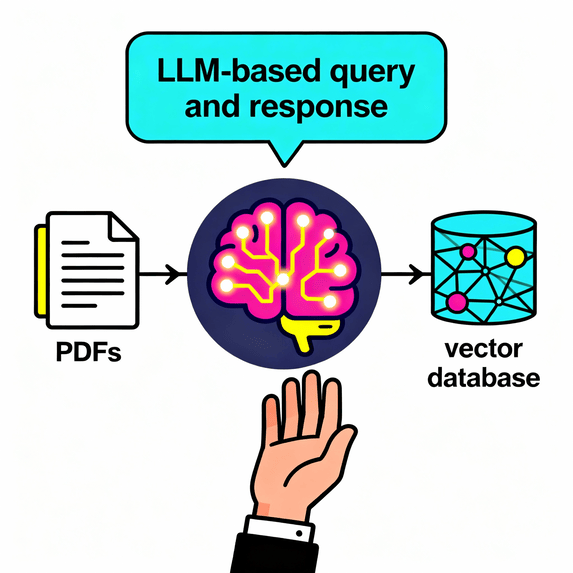

Performing the RAG-Driven Analysis on the AI Initiatives of the companies  

> <font color="red" size=5>**Your Task**</font>

1. Extract all PDF files from the provided ZIP file.
2. Read the content from each PDF file.
3. Split the content into manageable chunks.
4. Store the chunks in a vector database using embedding functions.
5. Implement a query mechanism on the vector database to retrieve results based on user queries regarding AI initiatives.
6. Evaluate the LLM generated response using LLM-as-Judge

### **A. Loading Company AI Initiative Documents (PDFs) -  1 mark**

In [ ]:
# Unzipping the AI Initiatives Documents
import zipfile
with zipfile.ZipFile("--- --- ---", 'r') as zip_ref:
  zip_ref.extractall("/content/")         # Storing all the unzipped contents in this location

In [ ]:
# Path of all AI Initiative Documents
ai_initiative_pdf_paths = [f"/content/Companies-AI-Initiatives/{file}" for file in os.listdir("/content/Companies-AI-Initiatives")]
ai_initiative_pdf_paths

In [ ]:
from langchain_community.document_loaders import PyPDFDirectoryLoader
loader = PyPDFDirectoryLoader(path = "--- --- ---")          # Creating an PDF loader object

In [ ]:
# Defining the text splitter
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size="--- --- ---",
    chunk_overlap="--- --- ---"
)

In [ ]:
# Splitting the chunks using the text splitter
ai_initiative_chunks = loader.load_and_split("--- --- ---")

In [ ]:
# Total length of all the chunks
len(ai_initiative_chunks)

### **B. Vectorizing AI Initiative Documents with ChromaDB - 1 mark**


In [ ]:
# Defining the 'text-embedding-ada-002' as the embedding model
from langchain_openai import OpenAIEmbeddings
embedding_model = OpenAIEmbeddings(model="--- --- ---")

In [ ]:
#  Creating a Vectorstore, storing all the above created chunks using an embedding model
vectorstore = Chroma.from_documents(
    "--- --- ---",
    embedding_model,
    collection_name="AI_Initiatives"
)

# Ignore if it gives an error or warning

In [ ]:
# Creating an retriever object which can fetch ten similar results from the vectorstore
retriever = vectorstore.as_retriever(
    search_type="--- --- ---",
    search_kwargs="--- --- ---"
)

### **C. Retrieving relevant Documents - 3 marks**

In [ ]:
user_message = "Give me the best project that `IBM` company is working upon"

In [ ]:
# Building the context for the query using the retrieved chunks
relevant_document_chunks = retriever.get_relevant_documents(user_message)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

In [ ]:
len(relevant_document_chunks)

In [ ]:
# Write a system message for an LLM to help craft a response from the provided context
qna_system_message = """

<--- YOUR_MESSAGE_GOES_HERE --->

"""

In [ ]:
# Write an user message template which can be used to attach the context and the questions
qna_user_message_template = """
###Context
Here are some documents that are relevant to the question mentioned below.
{context}

###Question
{question}
"""

In [ ]:
# Format the prompt
formatted_prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context="--- --- ---", question="--- --- ---")}
                [/INST]"""

In [ ]:
# Make the LLM call
resp = llm.invoke(formatted_prompt)
resp.content

In [ ]:
# Define RAG function
def RAG(user_message):
    """
    Args:
    user_message: Takes a user input for which the response should be retrieved from the vectorDB.
    Returns:
    relevant context as per user query.
    """
    relevant_document_chunks = retriever.get_relevant_documents("--- --- ---")
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)



    # Combine qna_system_message and qna_user_message_template to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context="--- --- ---", question="--- --- ---")}
                [/INST]"""

    # Quering the LLM
    try:
        response = llm."--- --- ---"(prompt)

    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response.content

In [ ]:
# Test Cases
print(RAG("How is the area in which GOOGL is working different from the area in which MSFT is working?"))

In [ ]:
print(RAG("What are the three projects on which MSFT is working upon?"))

In [ ]:
print(RAG("What is the timeline of each project in NVDA?"))

In [ ]:
print(RAG("What are the areas in which AMZN is investing when it comes to AI?"))

In [ ]:
print(RAG("What are the risks associated with projects within GOOG?"))

### **D. Evaluation of the RAG - 2 marks**

In [ ]:
# Writing a question for performing evaluations on the RAG
evaluation_test_question = "What are the three projects on which MSFT is working upon?"

In [ ]:
# Building the context for the evaluation test question using the retrieved chunks
relevant_document_chunks = retriever.get_relevant_documents(evaluation_test_question)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

In [ ]:
# Default RAG Answer
answer = RAG(evaluation_test_question)
print(answer)

In [ ]:
# Defining user messsage template for evaluation
evaluation_user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

##### **1. Groundedness**

In [ ]:
# Writing the system message and the evaluation metrics for checking the groundedness
groundedness_rater_system_message = """

<--- YOUR_MESSAGE_GOES_HERE --->

"""

In [ ]:
# Combining groundedness_rater_system_message + llm_prompt + answer for evaluation
groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
            {'user'}: {evaluation_user_message_template.format(context=context_for_query, question=evaluation_test_question, answer=answer)}
            [/INST]"""

In [ ]:
# Defining a new LLM object
groundness_checker = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    max_tokens=500,
    top_p=0.95,
    frequency_penalty=1.2,
    stop_sequences=['INST']
)

# Using the LLM-as-Judge for evaluating Groundedness
groundness_response = groundness_checker.invoke(groundedness_prompt)
print(groundness_response.content)

##### **2. Relevance**

In [ ]:
# Writing the system message and the evaluation metrics for checking the relevance
relevance_rater_system_message = """

<--- YOUR_MESSAGE_GOES_HERE --->

"""

In [ ]:
# Combining relevance_rater_system_message + llm_prompt + answer for evaluation
relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
            {'user'}: {evaluation_user_message_template.format(context=context_for_query, question=evaluation_test_question, answer=answer)}
            [/INST]"""

In [ ]:
# Defining a new LLM object
relevance_checker = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    max_tokens=500,
    top_p=0.95,
    frequency_penalty=1.2,
    stop_sequences=['INST']
)

# Using the LLM-as-Judge for evaluating Relevance
relevance_response = relevance_checker.invoke(relevance_prompt)
print(relevance_response.content)

#**5. Scoring and Ranking - 3 Marks**

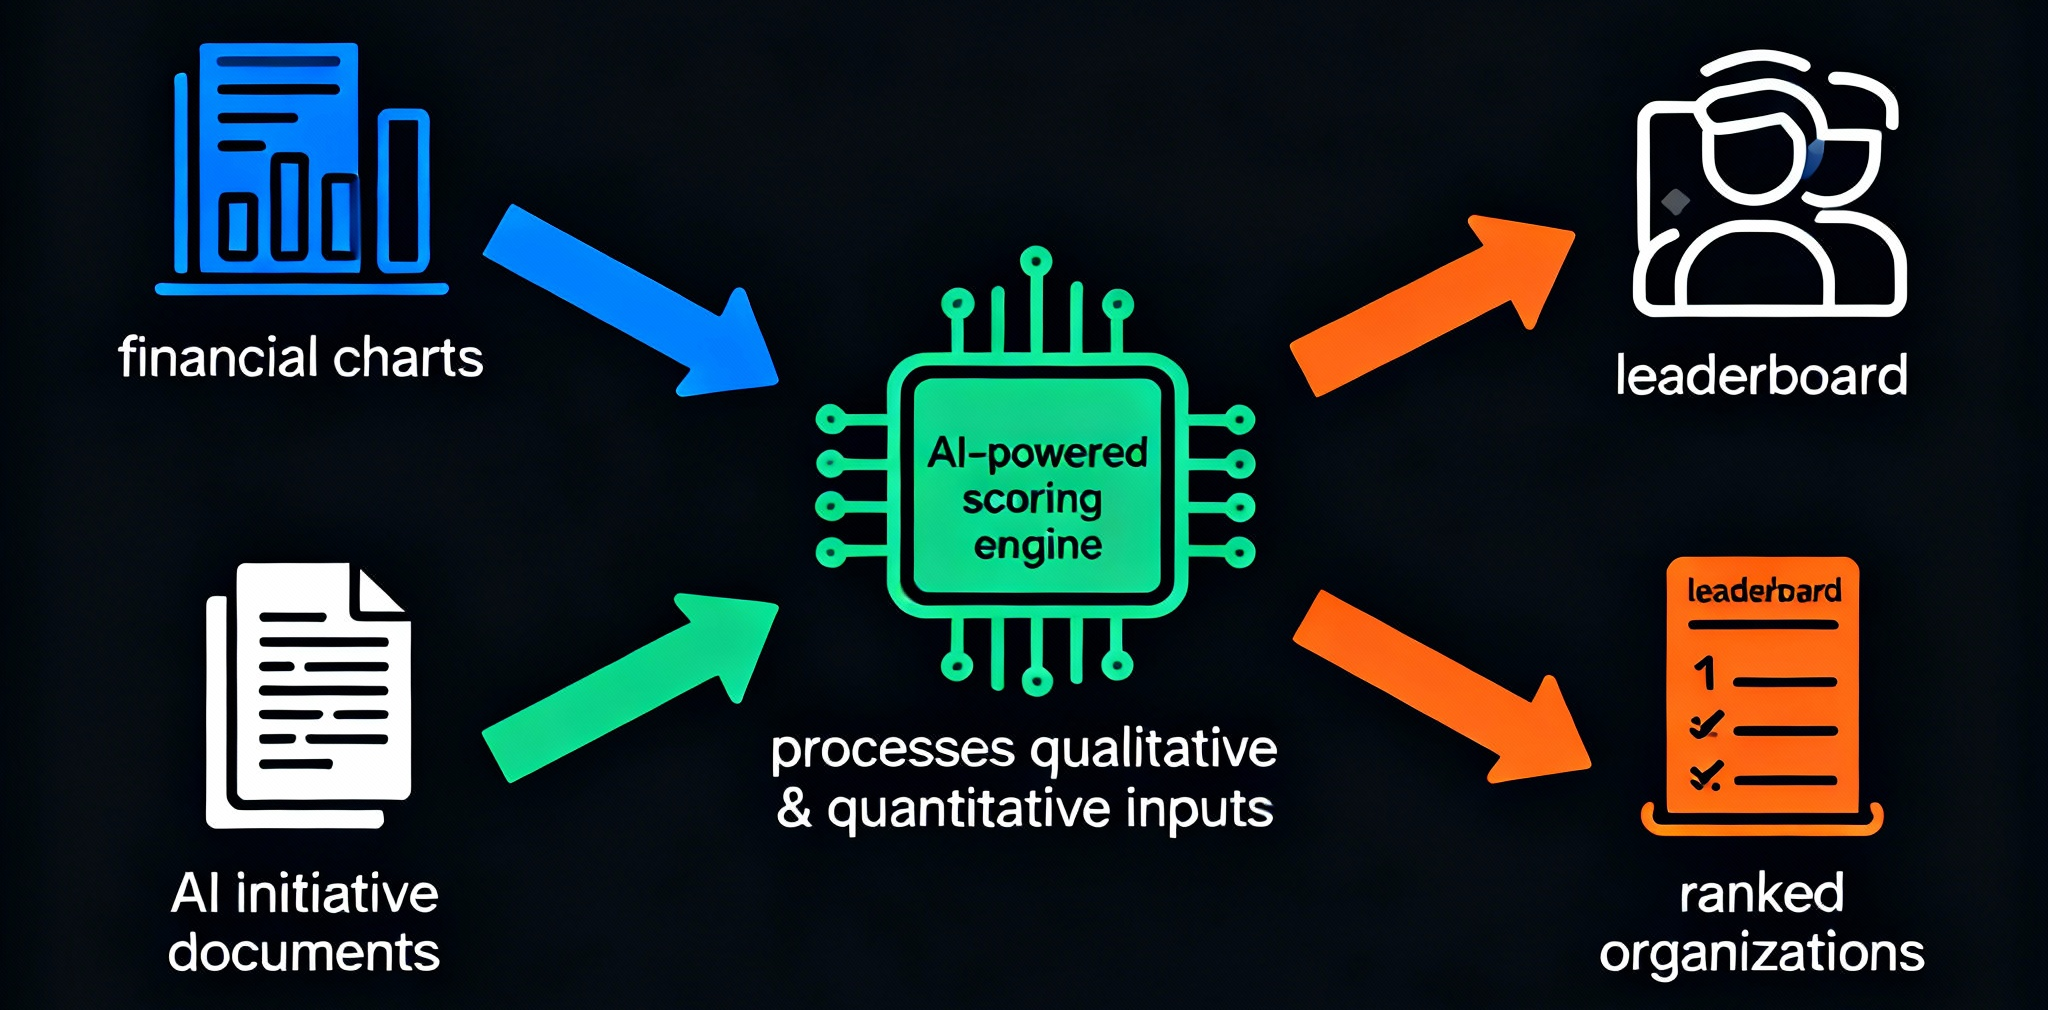

Prompting an LLM to score each company by integrating Quantitative data (stock trend, growth metrics) and Qualitative evidence (PDF insights)

> <font color="red" size=5>**Your Task**</font>
1. Write a system message and a user message that outlines the required data for the prompt.
2. Prompt the LLM to rank and recommend companies for investment based on the provided PDF and stock data to achieve better returns.

In [ ]:
# Fetching all the links of the documents
len(vectorstore.get()['documents'])

In [ ]:
# Write a system message for instructing the LLM for scoring and ranking the companies
system_message = """

<--- YOUR_MESSAGE_GOES_HERE --->

 """

In [ ]:
# Write a user message for instructing the LLM for scoring and ranking the companies
user_message = f"""

<--- YOUR_MESSAGE_GOES_HERE --->




---
### 1. Financial Data
{df.to_string()}

---
### 2. AI Initiatives
{vectorstore.get()['documents']}
"""

In [ ]:
# Formatting the prompt
formatted_prompt = f"""[INST]{system_message}\n
                {'user'}: {user_message}
                [/INST]"""

In [ ]:
# Calling the LLM
recommendation = llm.invoke(formatted_prompt)
recommendation.content

In [ ]:
print(recommendation.content)

#**6. Summary and Recommendation - 4 Marks**

Based on the project, learners are expected to share their observations, key learnings, and insights related to the business use case, including any challenges they encountered. Additionally, they should recommend improvements to the project and suggest further steps for enhancement.

**A. Summary / Your Observations about this Project - 2 Marks**


1.   
2.   
3.

**B. Recommendations for this Project / What improvements can be made to this Project - 2 Marks**

1.   
2.   
3.